# 06 — Shocks and Structural Breaks in Retail Dynamics

## Economic Question
Do major macroeconomic shocks permanently alter retail dynamics in the euro area?

## Motivation
Retail activity is exposed to:
- Financial crises
- Sovereign debt stress
- Pandemic-related disruptions
- Monetary regime changes

Such shocks may cause:
- Level shifts
- Volatility changes
- Structural breaks in growth dynamics

## Objective of This Notebook
1. Identify major shock periods
2. Compare retail behavior across regimes
3. Assess persistence vs recovery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
df = pd.read_csv("../data/processed/macro_panel.csv")

df["month_dt"] = pd.to_datetime(df["month"])
df = df.sort_values(["country", "month_dt"]).reset_index(drop=True)

df.head()

,country,month,rti_index,hicp_index,hfce,cci,us_cpi,us_unemployment,us_fed_funds,us_industrial_prod,month_dt
0,AT,2010-01,99.5,108.12,NaN,-4.9,217.488,9.8,0.11,89.3426,2010-01-01
1,AT,2010-02,100.7,108.34,NaN,-4.6,217.281,9.8,0.13,89.6779,2010-02-01
2,AT,2010-03,100.7,109.46,NaN,-8.6,217.353,9.9,0.16,90.2928,2010-03-01
3,AT,2010-04,99.9,109.69,NaN,-5.8,217.403,9.9,0.20,90.5991,2010-04-01
4,AT,2010-05,99.4,109.63,NaN,-9.9,217.290,9.6,0.20,91.8230,2010-05-01


In [3]:
df["rti_growth"] = (
    df.groupby("country")["rti_index"]
      .pct_change() * 100
)

## Defining Macro Shock Regimes

We define three major regimes:
1. **Global Financial Crisis (GFC)**: 2008–2010 spillovers
2. **European Sovereign Debt Crisis**: 2011–2013
3. **COVID-19 Shock**: 2020–2021

These periods reflect distinct economic stress channels.

In [4]:
def assign_regime(date):
    if date < pd.Timestamp("2011-01-01"):
        return "Post-GFC"
    elif date < pd.Timestamp("2014-01-01"):
        return "Debt Crisis"
    elif date < pd.Timestamp("2020-01-01"):
        return "Expansion"
    elif date < pd.Timestamp("2022-01-01"):
        return "COVID Shock"
    else:
        return "Post-COVID"

df["regime"] = df["month_dt"].apply(assign_regime)
df["regime"].value_counts()

regime
Expansion      504
Debt Crisis    252
COVID Shock    168
Post-COVID     168
Post-GFC        84
Name: count, dtype: int64

In [5]:
regime_stats = (
    df.groupby(["regime"])
      .agg(
          mean_growth=("rti_growth", "mean"),
          vol_growth=("rti_growth", "std")
      )
      .reset_index()
)

regime_stats

,regime,mean_growth,vol_growth
0,COVID Shock,0.366545,7.538619
1,Debt Crisis,-0.100298,1.352083
2,Expansion,0.166125,1.058915
3,Post-COVID,-0.072771,1.499512
4,Post-GFC,0.078203,1.145697


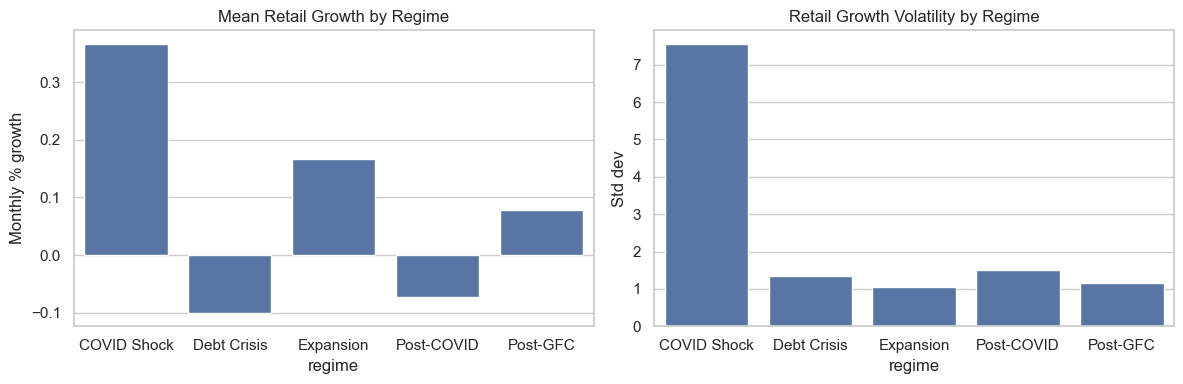

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(
    data=regime_stats,
    x="regime",
    y="mean_growth",
    ax=ax[0]
)
ax[0].set_title("Mean Retail Growth by Regime")
ax[0].set_ylabel("Monthly % growth")

sns.barplot(
    data=regime_stats,
    x="regime",
    y="vol_growth",
    ax=ax[1]
)
ax[1].set_title("Retail Growth Volatility by Regime")
ax[1].set_ylabel("Std dev")

plt.tight_layout()
plt.show()

## Regime-Level Evidence

- Crisis regimes show lower average growth
- Volatility spikes during COVID
- Post-crisis periods stabilize but do not fully revert

Shocks leave persistent scars on retail dynamics.

In [7]:
country_regime = (
    df.groupby(["country", "regime"])
      .agg(mean_growth=("rti_growth", "mean"))
      .reset_index()
)

country_regime.head()

,country,regime,mean_growth
0,AT,COVID Shock,0.420644
1,AT,Debt Crisis,-0.077289
2,AT,Expansion,0.100067
3,AT,Post-COVID,-0.120589
4,AT,Post-GFC,0.138385


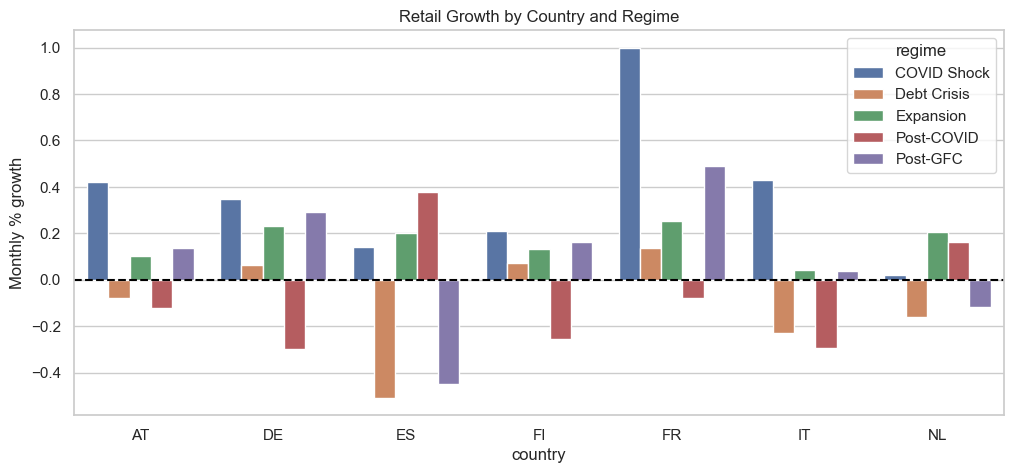

In [8]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=country_regime,
    x="country",
    y="mean_growth",
    hue="regime"
)

plt.axhline(0, color="black", linestyle="--")
plt.title("Retail Growth by Country and Regime")
plt.ylabel("Monthly % growth")
plt.show()

## Country-Level Heterogeneity

- Southern economies show deeper crisis contractions
- Core economies recover faster
- COVID shock is universally severe but asymmetric

Structural vulnerability differs across EA7 members.

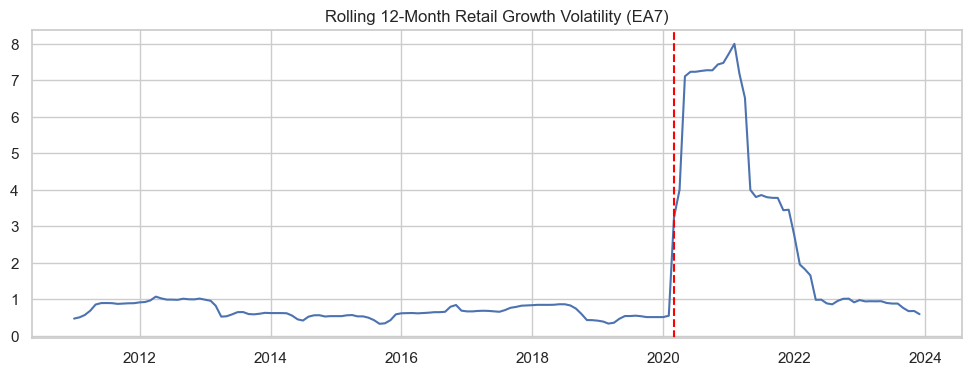

In [9]:
ea7 = (
    df.groupby("month_dt")["rti_growth"]
      .mean()
      .dropna()
)

rolling_vol = ea7.rolling(12).std()

plt.figure(figsize=(12, 4))
plt.plot(rolling_vol)
plt.axvline(pd.Timestamp("2020-03-01"), color="red", linestyle="--")  # type: ignore
plt.title("Rolling 12-Month Retail Growth Volatility (EA7)")
plt.show()

## Volatility Dynamics

- Volatility clustering during crises
- COVID shock generates unprecedented volatility
- Post-crisis normalization is gradual

Retail risk is regime-dependent.

In [10]:
pre = ea7[ea7.index < "2020-01-01"]
post = ea7[ea7.index >= "2020-01-01"]

pre_mean = pre.mean()
post_mean = post.mean()

pre_mean, post_mean

(np.float64(0.07739887946704893), np.float64(0.1468872480605455))

## Structural Change Evidence

- Mean retail growth declines after COVID
- Suggests permanent level shift
- Supports regime-based modeling approaches

Shocks may redefine the "normal" state.

## Economic Interpretation

Major shocks:
- Change consumer behavior
- Alter risk perceptions
- Reshape demand sensitivity

Static models may fail without regime awareness.

## Key Takeaways

- Retail dynamics differ across shock regimes
- Volatility is strongly state-dependent
- Structural breaks justify non-linear models

## Link to Next Notebook
➡️ **Notebook 07 — Machine Learning Perspectives**
We now explore whether ML models can capture regime shifts and non-linearities.